<a href="https://colab.research.google.com/github/immprasetyo/ibm-data-science/blob/main/classification-algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. SpaceX performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels
*   Create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [ ]:
#!pip install --upgrade matplotlib
#!pip install --upgrade seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#from sklearn.metrics import classification_report, confusion_matrix

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y, pred):
    'This function plots the confusion matrix'
    
    fig, ax = plt.subplots(figsize = (6, 4.5))
    cm = confusion_matrix(y, pred)
    
    sns.heatmap(cm, ax = ax, cmap = 'bone', annot = True)  # annot=True to annotate cells
    ax.set(
        xlabel = 'Predicted Labels',
        ylabel = 'True Labels',
        title = 'Confusion Matrix'
    )
    
    ax.xaxis.set_ticklabels(['Did not land', 'Land'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    fig.tight_layout()
    plt.show() 

## Load the dataframe


Load the data


In [3]:
f_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
resp = requests.get(f_url)
content = resp.content

with open('dataset_part_2.csv', 'wb') as f:
  f.write(content)

df = pd.read_csv('dataset_part_2.csv')

In [4]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
f_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp = requests.get(f_url)
content = resp.content

with open('dataset_part_3.csv', 'wb') as f:
  f.write(content)

hot_encoding_df = pd.read_csv('dataset_part_3.csv')

In [6]:
hot_encoding_df.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
print('Shape of df: {0}\nShape of hot_encoding: {1}'.format(df.shape, hot_encoding_df.shape))

Shape of df: (90, 18)
Shape of hot_encoding: (90, 83)


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>, make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
y = df['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [10]:
y.shape

(90,)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform


In [11]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(hot_encoding_df)

In [12]:
X[0:1]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. The training data and test data should be assigned to the following labels:


<code>X_train, X_test, Y_train, Y_test</code>


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 0)

we can see we only have 18 test samples.


In [14]:
y_test.shape

(30,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
# l1 Lasso, l2 Ridge
logr = LogisticRegression()

logr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

In [16]:
logr_cv = GridSearchCV(logr, logr_params, cv = 3)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
logr_cv.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']})

In [18]:
print('Tuned hyperparameters:', logr_cv.best_params_)
print('Accuracy:', logr_cv.best_score_)

Tuned hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8166666666666668


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
logr = logr_cv.best_estimator_
accuracy = logr.score(X_test, y_test)
print('Accuracy: {}'.format(round(accuracy, 3)))

Accuracy: 0.833


Lets look at the confusion matrix:


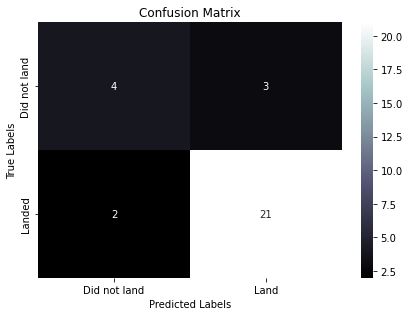

In [20]:
pred = logr.predict(X_test)
plot_confusion_matrix(y_test, pred)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
svm = SVC()

svm_params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': np.logspace(-3, 3, 5)
}

In [22]:
svm_cv = GridSearchCV(svm, svm_params, cv = 3)

In [23]:
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [24]:
print('Tuned hyperparameters:', svm_cv.best_params_)
print('Accuracy:', svm_cv.best_score_)

Tuned hyperparameters: {'C': 0.1, 'gamma': 31.622776601683793, 'kernel': 'sigmoid'}
Accuracy: 0.8666666666666667


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [25]:
svm = svm_cv.best_estimator_
accuracy = svm.score(X_test, y_test)
print('Accuracy: {}'.format(round(accuracy, 3)))

Accuracy: 0.8


We can plot the confusion matrix


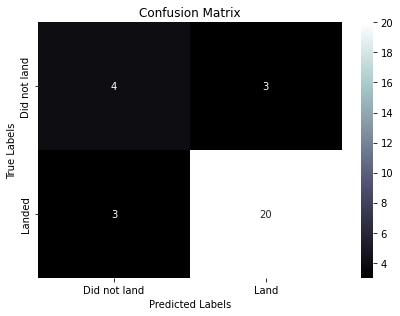

In [27]:
pred = svm.predict(X_test)
plot_confusion_matrix(y_test, pred)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [35]:
tree = DecisionTreeClassifier()

tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8]
}

In [36]:
tree_cv = GridSearchCV(tree, tree_params, cv = 3)

In [37]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'splitter': ['best', 'random']})

In [38]:
print('Tuned hyperparameters:', tree_cv.best_params_)
print('Accuracy:', tree_cv.best_score_)

Tuned hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.9166666666666666


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [39]:
tree = tree_cv.best_estimator_
accuracy = tree.score(X_test, y_test)
print('Accuracy: {}'.format(round(accuracy, 3)))

Accuracy: 0.767


We can plot the confusion matrix


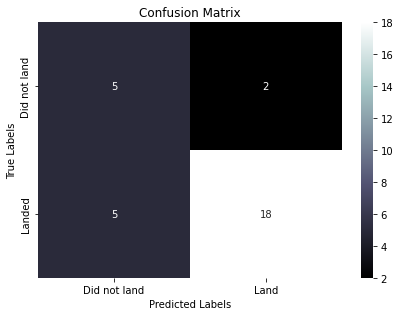

In [40]:
pred = tree.predict(X_test)
plot_confusion_matrix(y_test, pred)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [41]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [42]:
knn_cv = GridSearchCV(knn, knn_params, cv = 3)

In [43]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [44]:
print('Tuned hyperparameters:', knn_cv.best_params_)
print('Accuracy:', knn_cv.best_score_)

Tuned hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
Accuracy: 0.8666666666666667


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [45]:
knn = knn_cv.best_estimator_
accuracy = knn.score(X_test, y_test)
print('Accuracy: {}'.format(round(accuracy, 3)))

Accuracy: 0.867


We can plot the confusion matrix


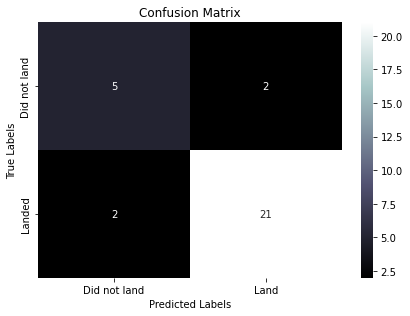

In [46]:
pred = knn.predict(X_test)
plot_confusion_matrix(y_test, pred)

## TASK  12


Find the method performs best:


In [50]:
models_dict = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'KNN'],
    'Train Accuracy': [0.817, 0.867, 0.917, 0.867],
    'Test Accuracy': [0.833, 0.8, 0.767, 0.867]
}

models_df = pd.DataFrame(models_dict)
models_df['Mean Accuracy'] = (models_df['Train Accuracy'] + models_df['Test Accuracy'])/2
models_df['Mean Accuracy'] = round(models_df['Mean Accuracy'], 3)
models_df

,Model,Train Accuracy,Test Accuracy,Mean Accuracy
0,Logistic Regression,0.817,0.833,0.825
1,Support Vector Machine,0.867,0.800,0.834
2,Decision Tree,0.917,0.767,0.842
3,KNN,0.867,0.867,0.867


In [51]:
models_df.sort_values(['Mean Accuracy'], ascending = False, inplace = True)
models_df

,Model,Train Accuracy,Test Accuracy,Mean Accuracy
3,KNN,0.867,0.867,0.867
2,Decision Tree,0.917,0.767,0.842
1,Support Vector Machine,0.867,0.800,0.834
0,Logistic Regression,0.817,0.833,0.825


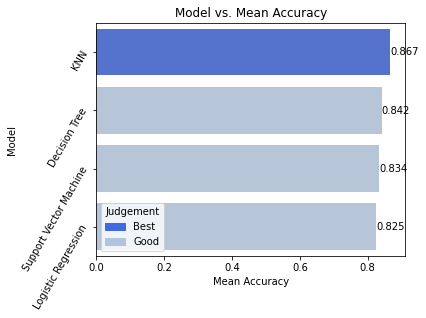

In [82]:
fig, ax = plt.subplots(figsize = (6, 4.5))
colors = ['royalblue' if i == max(models_df['Mean Accuracy']) else 'lightsteelblue' for i in models_df['Mean Accuracy']]

sns.barplot(
    ax = ax,
    x = 'Mean Accuracy',
    y = 'Model',
    data = models_df,
    orient = 'h',
    order = models_df['Model'],
    palette = colors
)

for i in ax.containers:
  ax.bar_label(i)

ax.set(
    xlabel = 'Mean Accuracy',
    ylabel = 'Model',
    title = 'Model vs. Mean Accuracy'
)

ax.tick_params(axis = 'y', labelrotation = 60)

legend_dict = {'Best': 'royalblue', 'Good': 'lightsteelblue'}
patches = []

for i in legend_dict:
  patch = ptc.Patch(label = i, color = legend_dict[i])
  patches.append(patch)

ax.legend(
    title = 'Judgement',
    handles = patches,
    bbox_to_anchor = (0, 0),
    loc = 3
)

fig.tight_layout()
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
